# Parte 1: Diseño de un Modelo de Machine Translation

Supuestos:

* Ingresan 3 secuencias de largo 6 al Encoder.
* Cada Token se separa por espacios, tanto en español como en **Xanith**. Por simplicidad, no tome en consideración los signos de puntuación. En Xanith, el guión (-) es parte de la palabra y no debe ser eliminado.
* Se considerará el número de palabras más comunes del español, es decir, **10.000**. En el caso del **Xanith**, al ser un idioma mucho más simple, cuenta con cerca de **1.000** palabras

### (a) Dibuje el esquema de la arquitectura utilizando GRUs. Especifique a su criterio, **todos los hiperparámetros** necesarios para esta tarea.

Se proporciona imagen de la arquitectura. Se utilizó canva para su elaboración.

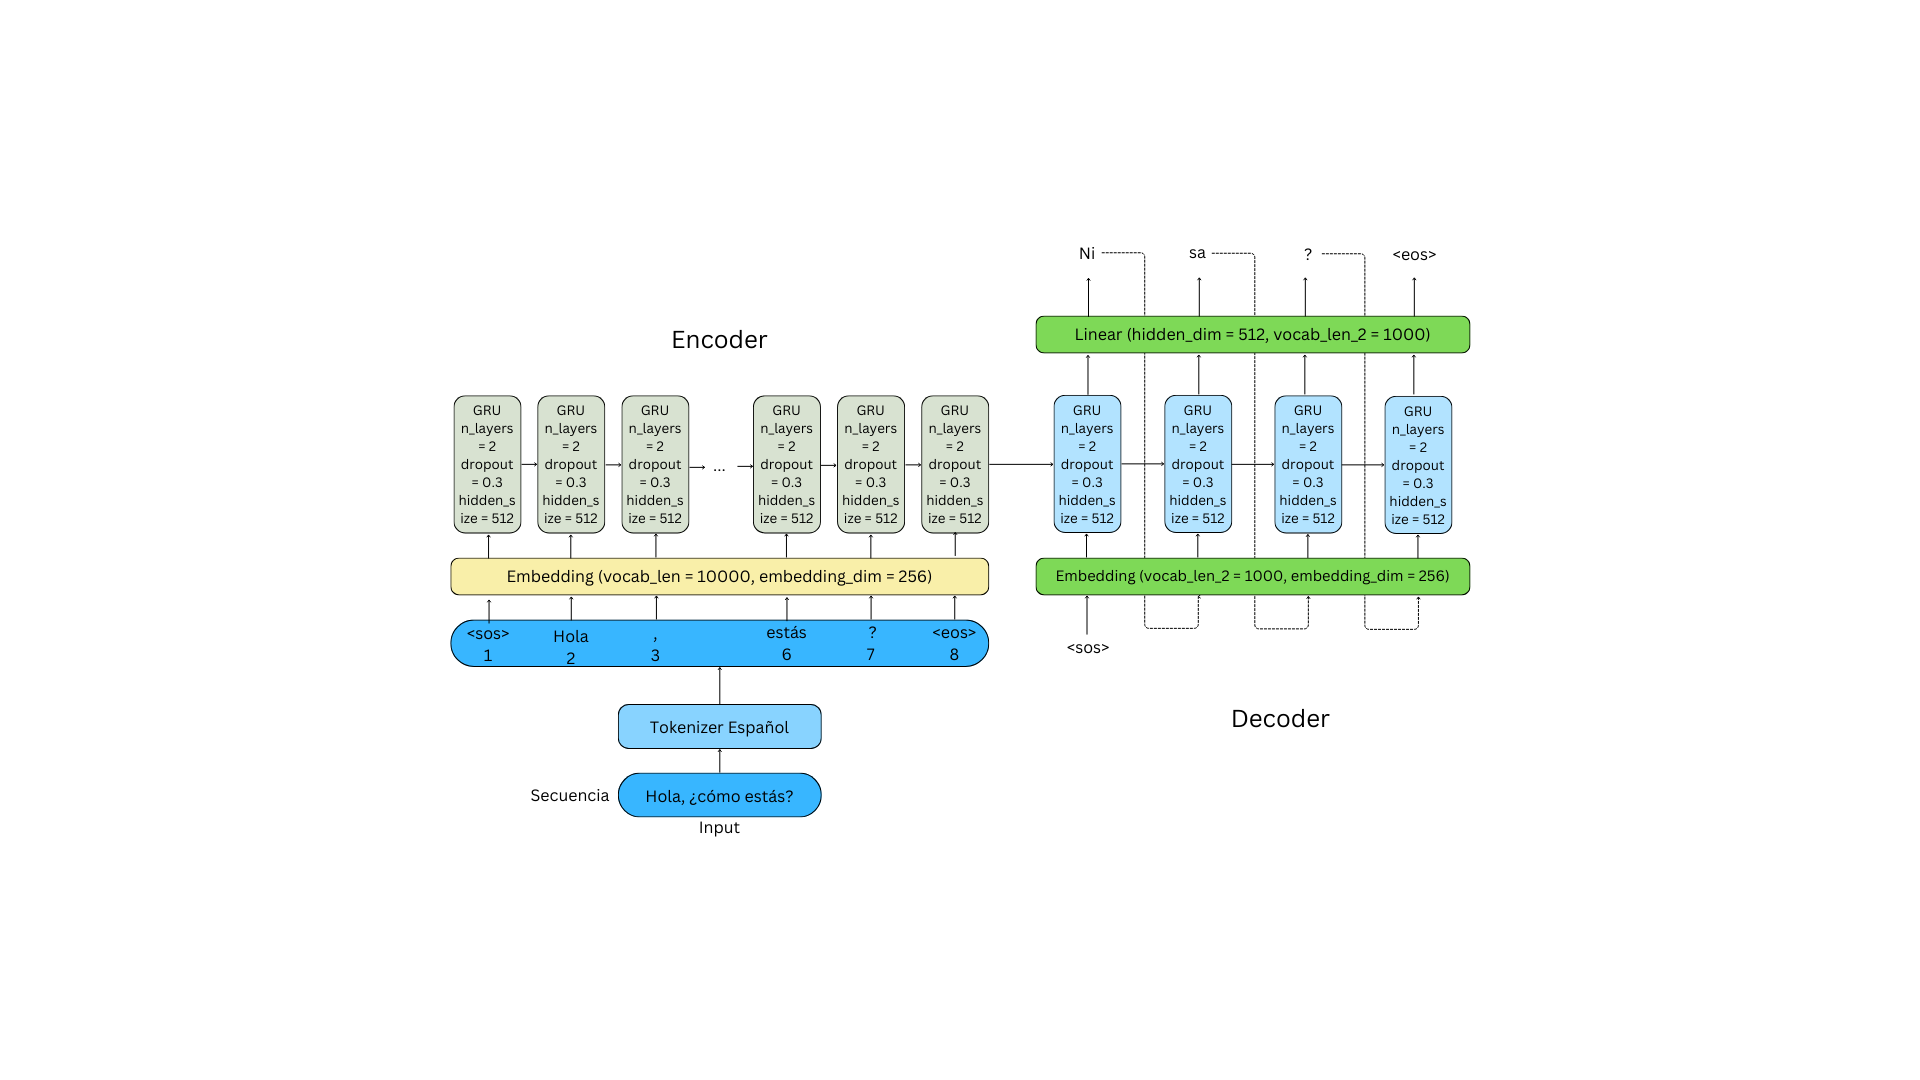

In [7]:
from IPython.display import Image
Image("Encoder-Decoder.png")

Podemos notar que los hyperparámetros principales son:
* GRU n_layers = 2
* GRU hidden_size = 512
* GRU dropout = 0.3
* vocab_len (del español) = 10.000
* embedding_dim = 256
* vocab_len_2 (del Xenith) = 1.000
* embedding_dim = 256

### (b) Se entrega una muestra de cómo sería el set de datos. ¿Qué tokens especiales agregaría para llevar esta tarea cumpliendo todos los supuestos dados? ¿Cómo quedaría la muestra del set de entrenamiento dada en la Tabla 1 luego de agregar dichos tokens?

En primer lugar es necesario incorporar los token especiales de \<sos>, \<eos> y \<pad> (comenzar una secuencia, terminar una secuencia, completar secuencia respectivamente), y adicionalmente tokens para palabras desconocidas \<unk>.
Considerando además que por ejemplo la palabra de-paz el guion no un token individual, por lo que seria necesario removerlo, y generar los tokens de las palabras que contengan - como "de-paz"

Español | Xanith
--------|-------
\<sos> Hola, ¿cómo estás? \<eos> | \<sos> Ni sa? \<eos>
\<sos> Vengo en son de paz \<eos> | \<sos> Lo ke da-paz. \<eos>
\<sos> Me gustaría aprender Xanith \<eos> | \<sos> Lo si Xanith larn. \<eos>

### (c) Muestre un ejemplo de Forward Pass con una de las frases al momento de entrenar. Explique claramente qué es lo que entra en el Encoder y el Decoder y qué es lo que sale del Decoder.

### (d) Muestre un ejemplo de Forward Pass pero al momento de predecir una nueva frase. Explique claramente qué es lo que entra en el Encoder y el Decoder y el proceso de Predicción Autoregresiva.

### (e) Calcule explicitamente cuáles serían las dimensiones de los tensores de salida de las siguientes partes del modelo: Justifique su respuesta

* Input Embedding
* Output embedding
* La salida del Encoder
* El último hidden state del Encoder
* La salida del Decoder
* Linear Projection
* Output de la Red (justo antes de entrar al Loss Function)

### (f) Implemente el diseño propuesto en Pytorch creando una clase que herede de nn.Module y muestre en pantalla el número de parámetros del modelo. Guarde el código en el archivo GRU.py. Con dichos resultados, responda la siguiente pregunta: ¿Cuál sería el número de Parámetros del Encoder, del Decoder y del Linear Projection?